<a href="https://colab.research.google.com/github/Zahra-Asghari/Compartmentalmodels-in-epidemiology/blob/main/SIRI_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install networkx
!pip install EoN
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.2/113.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for EoN: filename=EoN-1.1-py3-none-any.whl size=120793 sha256=94a1d2f2d16bd46dac1cb40eec09126ae9af295a098868bdf59a32f9608d5715
  Stored in directory: /root/.cache/pip/wheels/cc/38/06/01956d0db50e69cbcd6752d4b362685690c4fc17a80674bf18
Successfully built EoN


In [7]:
!pip install collections

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


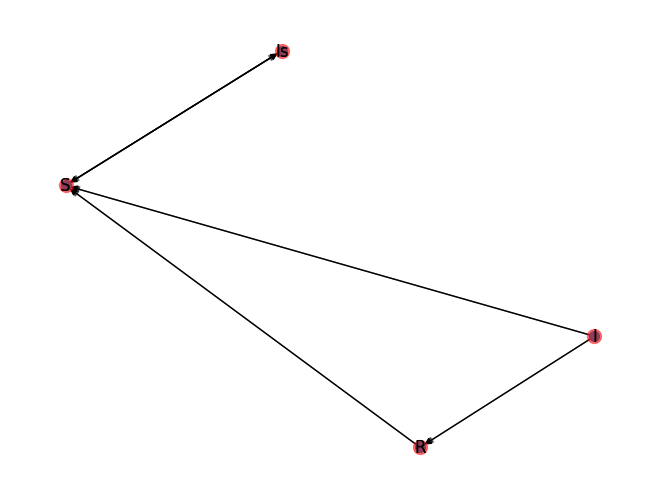

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import EoN
from collections import defaultdict

a = 0.1
b = 0.009
y = 0.008
d = 0.002
to_isolation_rate = 0.005
from_isolation_rate = 1


Gnp = nx.gnp_random_graph(300, 0.01)

H = nx.DiGraph() #For the spontaneous transitions
H.add_edge('I', 'R', rate = b)  # an infected node can be recovered/removed
H.add_edge('I', 'S', rate = y)  # an infected node can become susceptible again
H.add_edge('R', 'S', rate = d)  # a recovered node can become suscepticle again
H.add_edge('S', 'Is', rate = to_isolation_rate) # a suscepticle node can become isolated
H.add_edge('Is', 'S', rate = from_isolation_rate) # an isolated node can become suscepticle again

pos = nx.spring_layout(H)  # Set the position of nodes
nx.draw(H, pos, with_labels=True, node_size=50)  # the main Graph
nx.draw(H, pos, with_labels=True, node_color='r', alpha=0.5, node_size=100)  # Plot transitions graph with red color
plt.show()



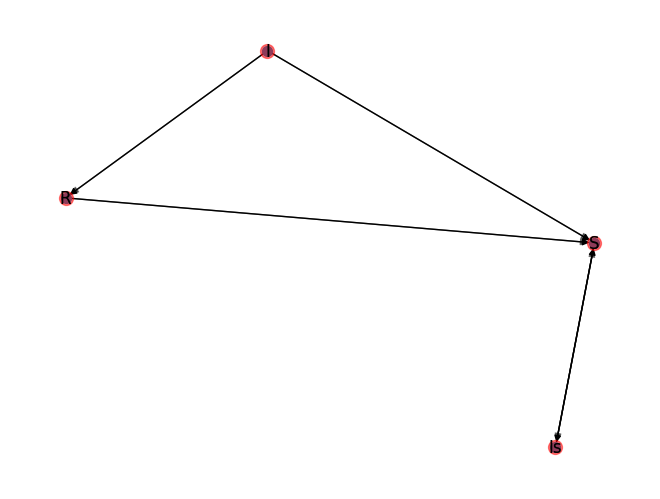

In [12]:


J = nx.DiGraph() #for the induced transitions
J.add_edge(('I', 'S'),('I', 'I'), rate = a)  # a susceptible node can become infected from a neighbour
pos = nx.spring_layout(H)  # Set the position of nodes
nx.draw(H, pos, with_labels=True, node_size=50)  # the main Graph
nx.draw(H, pos, with_labels=True, node_color='r', alpha=0.5, node_size=100)  # Plot transitions graph with red color
plt.show()

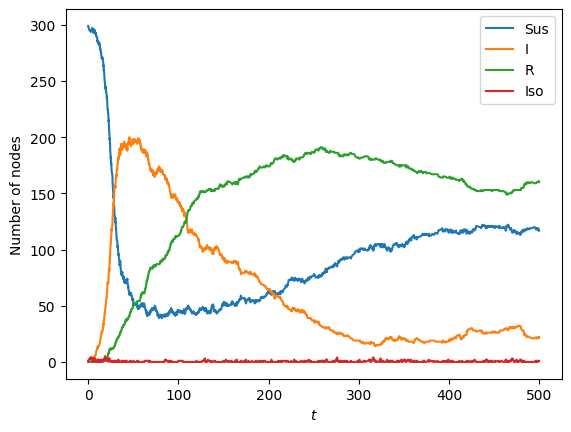

In [13]:
IC = defaultdict(lambda: 'S')

IC[0] = 'I'

return_statuses = ('S', 'I', 'R', 'Is')

t, S, I, R, Is = EoN.Gillespie_simple_contagion(Gnp, H, J, IC, return_statuses, tmax = 500)

plt.plot(t, S, label = 'Sus')
plt.plot(t, I, label = 'I')
plt.plot(t, R, label = 'R')
plt.plot(t, Is, label = 'Iso')
plt.xlabel('$t$')
plt.ylabel('Number of nodes')
plt.legend()
plt.show()